In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 


housing_data = 'data/housing.csv'

df_housing = pd.read_csv(housing_data)

df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
df_housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
df_housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_housing,test_size=0.2,random_state=42)

In [16]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


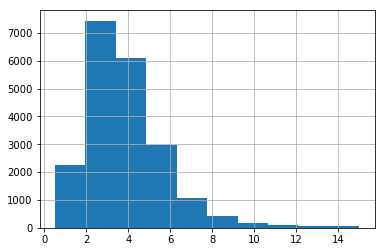

In [18]:
df_housing["median_income"].hist()

In [20]:
df_housing["income_cat"] = np.ceil(df_housing["median_income"]/1.5)

#label those above 5 as 5
df_housing["income_cat"].where(df_housing["income_cat"] < 5,5.0, inplace=True)

In [21]:
df_housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [22]:
# Segmenting the  data by strata with respect to income

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(df_housing,df_housing["income_cat"]):
    strat_train_set = df_housing.loc[train_index]
    strat_test_set = df_housing.loc[test_index]

In [23]:
df_housing["income_cat"].value_counts()/len(df_housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

### Visualize the data to gain more insights 

In [24]:
housing = strat_train_set.copy()

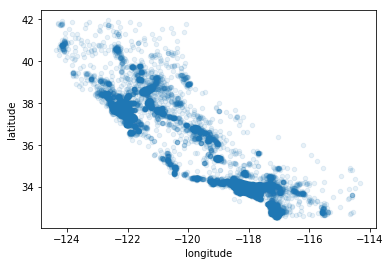

In [26]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

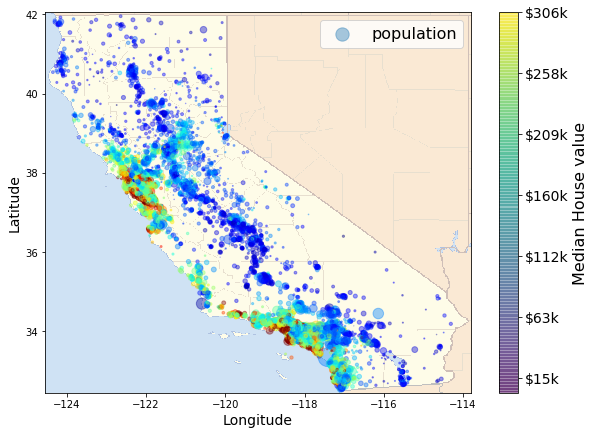

In [29]:
import matplotlib.image as mpimg

california_img = mpimg.imread("data/california.png")
ax = housing.plot(kind='scatter',x="longitude",y="latitude",figsize=(10,7),
                 s=housing["population"]/100,label="population",
                 c="median_house_value",cmap=plt.get_cmap("jet"),
                 colorbar=False,alpha=0.4)

plt.imshow(california_img,extent=[-124.55,-113.80,32.45,42.05],alpha=0.5)
plt.ylabel("Latitude",fontsize=14)
plt.xlabel("Longitude",fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(),prices.max(),11)
cbar = plt.colorbar()

cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values],fontsize=14)
cbar.set_label("Median House value", fontsize=16)

plt.legend(fontsize=16)
plt.show()

In [30]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F76678F6A0>,
      dtype=object)

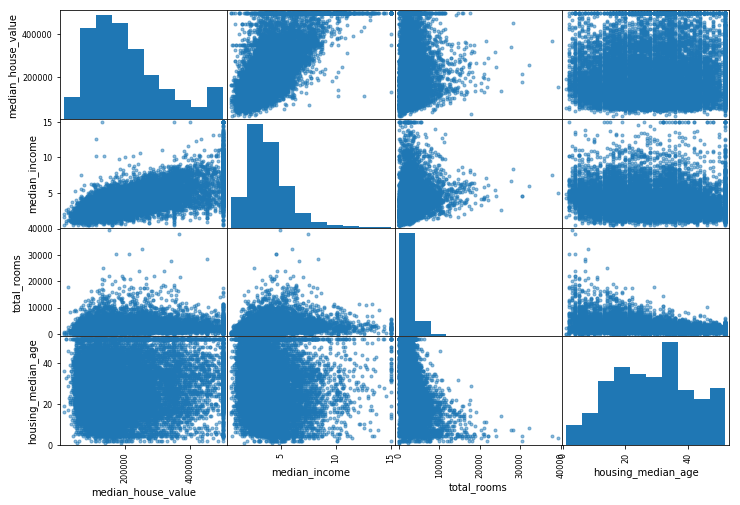

In [31]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms",
             "housing_median_age"]

scatter_matrix(housing[attributes],figsize=(12,8))

##### we can see that there is a relatively strong correclation between the median_house_value and the median_income


[0, 16, 0, 550000]

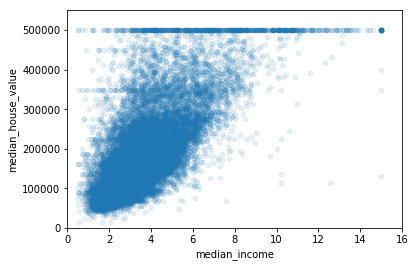

In [33]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",
            alpha=0.1)
plt.axis([0,16,0,550000])

#### creating new features 

In [34]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [35]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
income_cat                  0.642274
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

#### Preparing the data for ML 

In [36]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [37]:
from sklearn.preprocessing import Imputer 

imputer = Imputer(strategy='median')

housing_num = housing.drop('ocean_proximity',axis=1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

##### Replace missing values by the median 

In [41]:
imputer = Imputer(strategy='median')

In [44]:
## Remove the text attributes
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [46]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

###### Transforming the training set 

In [47]:
X = imputer.transform(housing_num)

In [48]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,
                         index=list(housing.index.values))

In [49]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,3.0


In [51]:
### Encode the text attribute "ocean proximity"
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [52]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

#### Building custom transformers 

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self,X,y=None):
        return self # nothin else to do 
    
    def transform(self,X,y=None):
        rooms_per_household = X[:, rooms_ix]/ X[:,household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/ X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
        

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [62]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+ ["rooms_per_household","population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,2,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,5,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,2,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,2,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,3,4.50581,3.04785


#### Scaling features 

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


numerical_values_pipeline = Pipeline([
    ('Imputer',Imputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])

housing_num_tr = numerical_values_pipeline.fit_transform(housing_num)


In [65]:
from sklearn.base import BaseEstimator, TransformerMixin

# create a class to select numerical or categorical columns
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes_names):
        self.attributes_names = attributes_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attributes_names].values

In [67]:
from sklearn.preprocessing import LabelBinarizer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]


numerical_attributes_pipeline= Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer',Imputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
    ])

categorical_attributes_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizer())
])


In [68]:
# Unifying features
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("numerical_attributes_pipeline", numerical_attributes_pipeline),
    ("categorical_attributes_pipeline",categorical_attributes_pipeline),
])

In [69]:
housing_data_prepared = full_pipeline.fit_transform(housing)
housing_data_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

### Model Selection and training 

In [71]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(housing_data_prepared,housing_labels)

In [72]:
lin_reg.score(housing_data_prepared,housing_labels)

0.6507370633860872

In [73]:
### Making prediction on a few samples of the data
sample_data = housing.iloc[:5]
sample_labels = housing_labels.iloc[:5]
sample_data_prepared = full_pipeline.transform(sample_data)

print("Predictions: ", lin_reg.predict(sample_data_prepared))

Predictions:  [203682.37379543 326371.39370781 204218.64588245  58685.4770482
 194213.06443039]


#### Metrics to see how well the classifier has performed

In [75]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_data_prepared)
linear_mse = mean_squared_error(housing_labels,housing_predictions)

linear_rmse = np.sqrt(linear_mse)
linear_rmse

68376.64295459937

#### Trying a decision tree 

In [76]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(housing_data_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

In [77]:
print("Decision tree score: {}".format(tree_regressor.score(housing_data_prepared,housing_labels)))

Decision tree score: 1.0


In [79]:
housing_predictions = tree_regressor.predict(housing_data_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [82]:
### Cross-validation scores
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_regressor,housing_data_prepared,housing_labels,
                        scoring="neg_mean_squared_error",cv=10)
tree_rmse_errors = np.sqrt(-scores)

print("\n" + "Tree RMSE scores: " + str(tree_rmse_errors) +\
     " Mean: " + str(tree_rmse_errors.mean()) + \
     " Stdev: " + str(tree_rmse_errors.std()))


Tree RMSE scores: [70307.54079165 67270.94561829 71361.89886493 68889.91784739
 70992.94150631 74140.66907294 70607.72083897 70576.13836762
 76433.16342183 70270.96266671] Mean: 71085.189899664 Stdev: 2431.961029690467


#### Trying a random forest model 

In [83]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_data_prepared,housing_labels)

C:\Users\Arnaud wanet\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [85]:
housing_predictions = forest_reg.predict(housing_data_prepared)
forest_mse = mean_squared_error(housing_labels,housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22112.540875989125

####  Support vector regressor

In [86]:
from sklearn.svm import SVR


svm_reg = SVR(kernel='linear')
svm_reg.fit(housing_data_prepared,housing_labels)

housing_predictions = svm_reg.predict(housing_data_prepared)
svm_mse = mean_squared_error(housing_predictions,housing_labels)

svm_rmse = np.sqrt(svm_mse)
svm_rmse

106874.50415237377

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30],
    'max_features': [2,4,6,8]},
    {'bootstrap': [False],
    'n_estimators': [3,10],
    'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid,cv=5,
                          scoring='neg_mean_squared_error')
grid_search.fit(housing_data_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [92]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [93]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [94]:
best_rf = grid_search.best_estimator_
best_rf.score(housing_data_prepared,housing_labels)

0.9712172588413479

#####  Randomized search cross validation

In [96]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 

param_distribs = {
    'n_estimators': randint(low=1,high=200),
    'max_features': randint(low=1,high=8)
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg,param_distributions=param_distribs,
                               n_iter=10,cv=5, scoring='neg_mean_squared_error',
                               random_state=42)
rnd_search.fit(housing_data_prepared,housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F76982FC18>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F76982FAC8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [98]:
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=7, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [99]:
rnd_search.best_estimator_.score(housing_data_prepared,housing_labels)

0.9749742080367116

##### Feature importances 

In [102]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)

In [104]:
feature_importances = grid_search.best_estimator_.feature_importances_


extra_attribs = ["rooms_per_household","pop_per_household","bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances,attributes),reverse=True)

[(0.24136048955382883, 'median_income'),
 (0.16197658459849276, 'income_cat'),
 (0.10882123891274476, 'INLAND'),
 (0.10627352591969835, 'pop_per_household'),
 (0.06793261134305181, 'longitude'),
 (0.06182807241916786, 'latitude'),
 (0.061404514078416045, 'bedrooms_per_room'),
 (0.05359825584988402, 'rooms_per_household'),
 (0.04333950231438806, 'housing_median_age'),
 (0.019326989179411204, 'population'),
 (0.01832915558242795, 'total_bedrooms'),
 (0.01810170268968371, 'total_rooms'),
 (0.01783695799011688, 'households'),
 (0.012235325483341324, '<1H OCEAN'),
 (0.0050080768169210735, 'NEAR OCEAN'),
 (0.002599382944523225, 'NEAR BAY'),
 (2.7614323902184926e-05, 'ISLAND')]

In [105]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()


X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_model.score(X_test_prepared,y_test)

0.8154809091145091

##### quite good, slighltly overffitting but quite good! 

#### Saving the model 

In [110]:
house_price_prediction_model = final_model

In [111]:
from sklearn.externals import joblib

joblib.dump(house_price_prediction_model,"house_price_model.pkl")

['house_price_model.pkl']